# Can you help reduce employee turnover?

## 📖 Background
You work for the human capital department of a large corporation. The Board is worried about the relatively high turnover, and your team must look into ways to reduce the number of employees leaving the company.

The team needs to understand better the situation, which employees are more likely to leave, and why. Once it is clear what variables impact employee churn, you can present your findings along with your ideas on how to attack the problem.

## 💾 The data
The department has assembled data on almost 10,000 employees. The team used information from exit interviews, performance reviews, and employee records.

- "department" - the department the employee belongs to.
- "promoted" - 1 if the employee was promoted in the previous 24 months, 0 otherwise.
- "review" - the composite score the employee received in their last evaluation.
- "projects" - how many projects the employee is involved in.
- "salary" - for confidentiality reasons, salary comes in three tiers: low, medium, high.
- "tenure" - how many years the employee has been at the company.
- "satisfaction" - a measure of employee satisfaction from surveys.
- "avg_hrs_month" - the average hours the employee worked in a month.
- "left" - "yes" if the employee ended up leaving, "no" otherwise.

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('./data/employee_churn_data.csv')
df.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no


## Exploratory Data Analysis

this exploration is guided by the objective to understand the variables in this dataset and how the independet variables relate to the dependent variable 'left' representing employee churn.
Looking a the variable types, w

In [2]:
categorical_var = ['department', 'promoted', 'salary', 'bonus', 'left']
numerical_var = ['review', 'projects', 'tenure', 'satisfaction', 'avg_hrs_month']

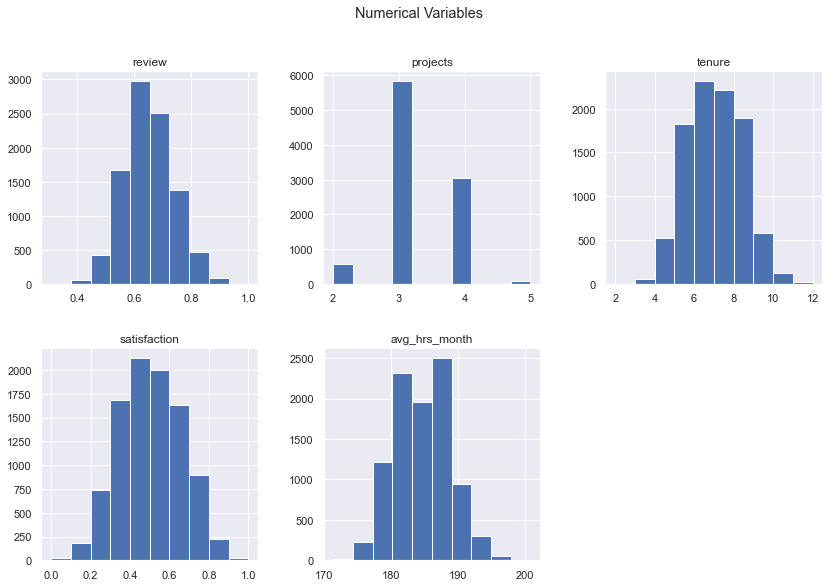

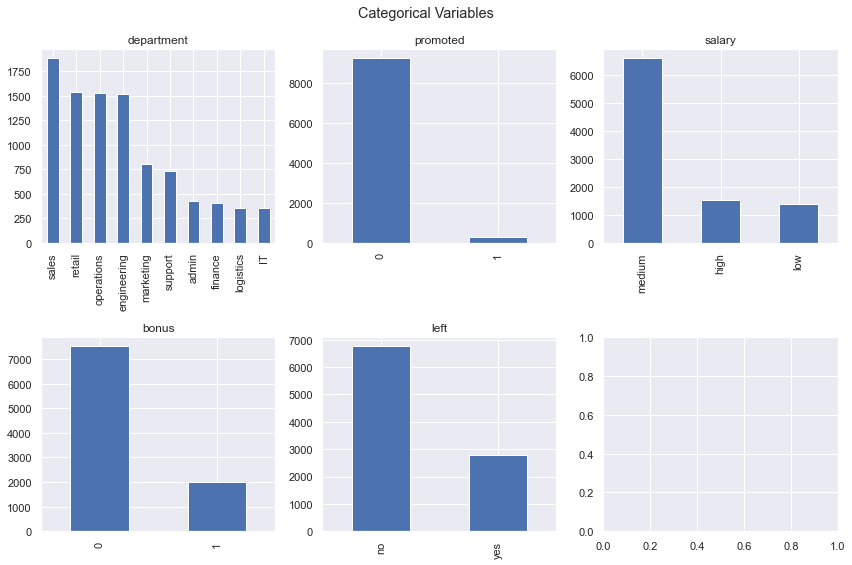

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set()
sns.set(rc={"figure.figsize":(14, 9)})

df[numerical_var].hist(layout=(2,3), figsize=(14,9))
plt.suptitle('Numerical Variables')


fig, ax = plt.subplots(2,3, figsize=(12,8))
for catvar, sub in zip(categorical_var, ax.flatten()):
    df[catvar].value_counts().plot(kind='bar', title=catvar, layout=(2,3), ax=sub)
plt.suptitle('Categorical Variables')
fig.tight_layout()
plt.show()

Looking at the dependant variable, we can see indeed only two outcomes. With 'no' as the status for the employee not having left with a share of approx. 70% (6756/9540) across all records.

## 1. Which department has the highest employee turnover? Which one has the lowest?

In [4]:
turnover = pd.get_dummies(df)
print(turnover.columns)
col_order= ['promoted', 'review', 'projects', 'tenure', 'satisfaction', 'bonus',
       'avg_hrs_month', 'department_IT', 'department_admin',
       'department_engineering', 'department_finance', 'department_logistics',
       'department_marketing', 'department_operations', 'department_retail',
       'department_sales', 'department_support', 'salary_high', 'salary_low',
       'salary_medium', 'left' ]
turnover = turnover.reindex(columns=col_order)
turnover.head()

Index(['promoted', 'review', 'projects', 'tenure', 'satisfaction', 'bonus',
       'avg_hrs_month', 'department_IT', 'department_admin',
       'department_engineering', 'department_finance', 'department_logistics',
       'department_marketing', 'department_operations', 'department_retail',
       'department_sales', 'department_support', 'salary_high', 'salary_low',
       'salary_medium', 'left_no', 'left_yes'],
      dtype='object')


,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month,department_IT,department_admin,department_engineering,...,department_logistics,department_marketing,department_operations,department_retail,department_sales,department_support,salary_high,salary_low,salary_medium,left
0,0,0.577569,3,5.0,0.626759,0,180.866070,0,0,0,...,0,0,1,0,0,0,0,1,0,NaN
1,0,0.751900,3,6.0,0.443679,0,182.708149,0,0,0,...,0,0,1,0,0,0,0,0,1,NaN
2,0,0.722548,3,6.0,0.446823,0,184.416084,0,0,0,...,0,0,0,0,0,1,0,0,1,NaN
3,0,0.675158,4,8.0,0.440139,0,188.707545,0,0,0,...,1,0,0,0,0,0,1,0,0,NaN
4,0,0.676203,3,5.0,0.577607,1,179.821083,0,0,0,...,0,0,0,0,1,0,1,0,0,NaN


In [5]:
grouped_turnover = turnover.groupby('left')
#print(grouped_turnover['department_IT'])
grouped_turnover.first()

turnover.groupby('department_IT').first()

,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month,department_admin,department_engineering,department_finance,department_logistics,department_marketing,department_operations,department_retail,department_sales,department_support,salary_high,salary_low,salary_medium,left
department_IT,,,,,,,,,,,,,,,,,,,,
0,0,0.577569,3,5.0,0.626759,0,180.866070,0,0,0,0,0,1,0,0,0,0,1,0,NaN
1,0,0.683206,2,5.0,0.565252,1,178.841879,0,0,0,0,0,0,0,0,0,0,0,1,NaN


In [6]:
#df.left.value_counts(normalize=True)
df['left'] = df['left'].map({'yes':True, 'no':False})


In [7]:
#df.pivot(columns = 'department', values =['left'], aggfunc=np.mean)
piv = pd.pivot_table(df,values=['left'], index='tenure', columns = 'department', aggfunc=np.mean, margins=True, margins_name='total')
piv.columns = piv.columns.droplevel(0)
piv.loc['total_diff'] = (piv.loc['total'] / piv.loc['total','total'] -1 )
piv

department,IT,admin,engineering,finance,logistics,marketing,operations,retail,sales,support,total
tenure,,,,,,,,,,,
2.0,0.000000,1.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.666667
3.0,1.000000,0.600000,0.250000,0.000000,0.750000,0.500000,0.250000,0.666667,0.571429,0.600000,0.526316
4.0,0.250000,0.125000,0.363636,0.321429,0.500000,0.388889,0.321839,0.393939,0.377358,0.400000,0.359073
5.0,0.275862,0.200000,0.226481,0.192308,0.176471,0.262069,0.229391,0.255102,0.244032,0.225352,0.234778
6.0,0.222222,0.140000,0.215084,0.213592,0.280899,0.224880,0.228412,0.196931,0.186364,0.183908,0.206658
7.0,0.418605,0.450549,0.388732,0.309278,0.358025,0.389831,0.342618,0.391304,0.368421,0.337017,0.372567
8.0,0.430556,0.469136,0.394822,0.397260,0.450704,0.414474,0.443366,0.466877,0.422652,0.492958,0.435911
9.0,0.045455,0.031250,0.011628,0.166667,0.000000,0.043478,0.010989,0.042553,0.008696,0.000000,0.024221
10.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [8]:
piv.loc['total_diff'].index

Index(['IT', 'admin', 'engineering', 'finance', 'logistics', 'marketing',
       'operations', 'retail', 'sales', 'support', 'total'],
      dtype='object', name='department')

department
finance       -0.079388
admin         -0.035981
sales         -0.022756
operations    -0.018363
engineering   -0.012217
support       -0.011612
total          0.000000
marketing      0.038272
retail         0.047363
logistics      0.056573
IT             0.058819
Name: total_diff, dtype: float64
[ 0  1  2  3  4  5  6  7  8  9 10]


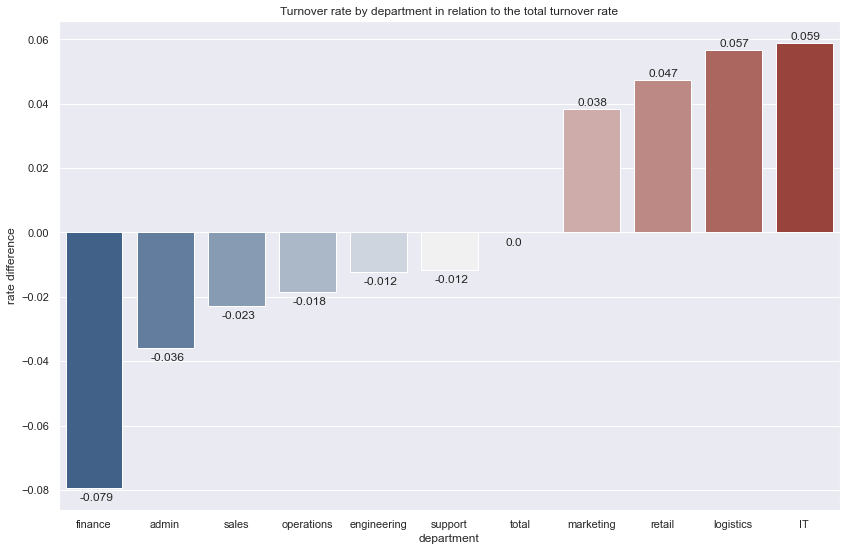

In [9]:
def bar_values(x,y):
    for i in range(len(x)):
        if y[i]>0:
            plt.text(i-0.2,y[i]+0.001,round(y[i],3))
        else:
            plt.text(i-0.2,y[i]-0.004,round(y[i],3))
            
diff = piv.loc['total_diff'].sort_values()
print(diff)
rank = np.arange(0,len(diff))
print(rank)
#palette = sns.color_palette("icefire", len(rank)) 
palette = sns.color_palette(sns.diverging_palette(250, 15, s=75, l=40,
                                 n=11))

#diff.plot(kind='bar', title='Turnover rate by department in relation to the total turnover rate', colors=np.array(palette)[rank])
ax = sns.barplot(x = diff.index, y = diff.values, palette=np.array(palette)[rank])
plt.xticks(rotation=0)
plt.ylabel('rate difference')
bar_values(diff.index, diff.values)
plt.title('Turnover rate by department in relation to the total turnover rate')
plt.show()


answer Q

## 2. Which variables seem to be better predictors of employee departure?

Let's plot all variables against each other in order to gain an overview and further understanding of the data.

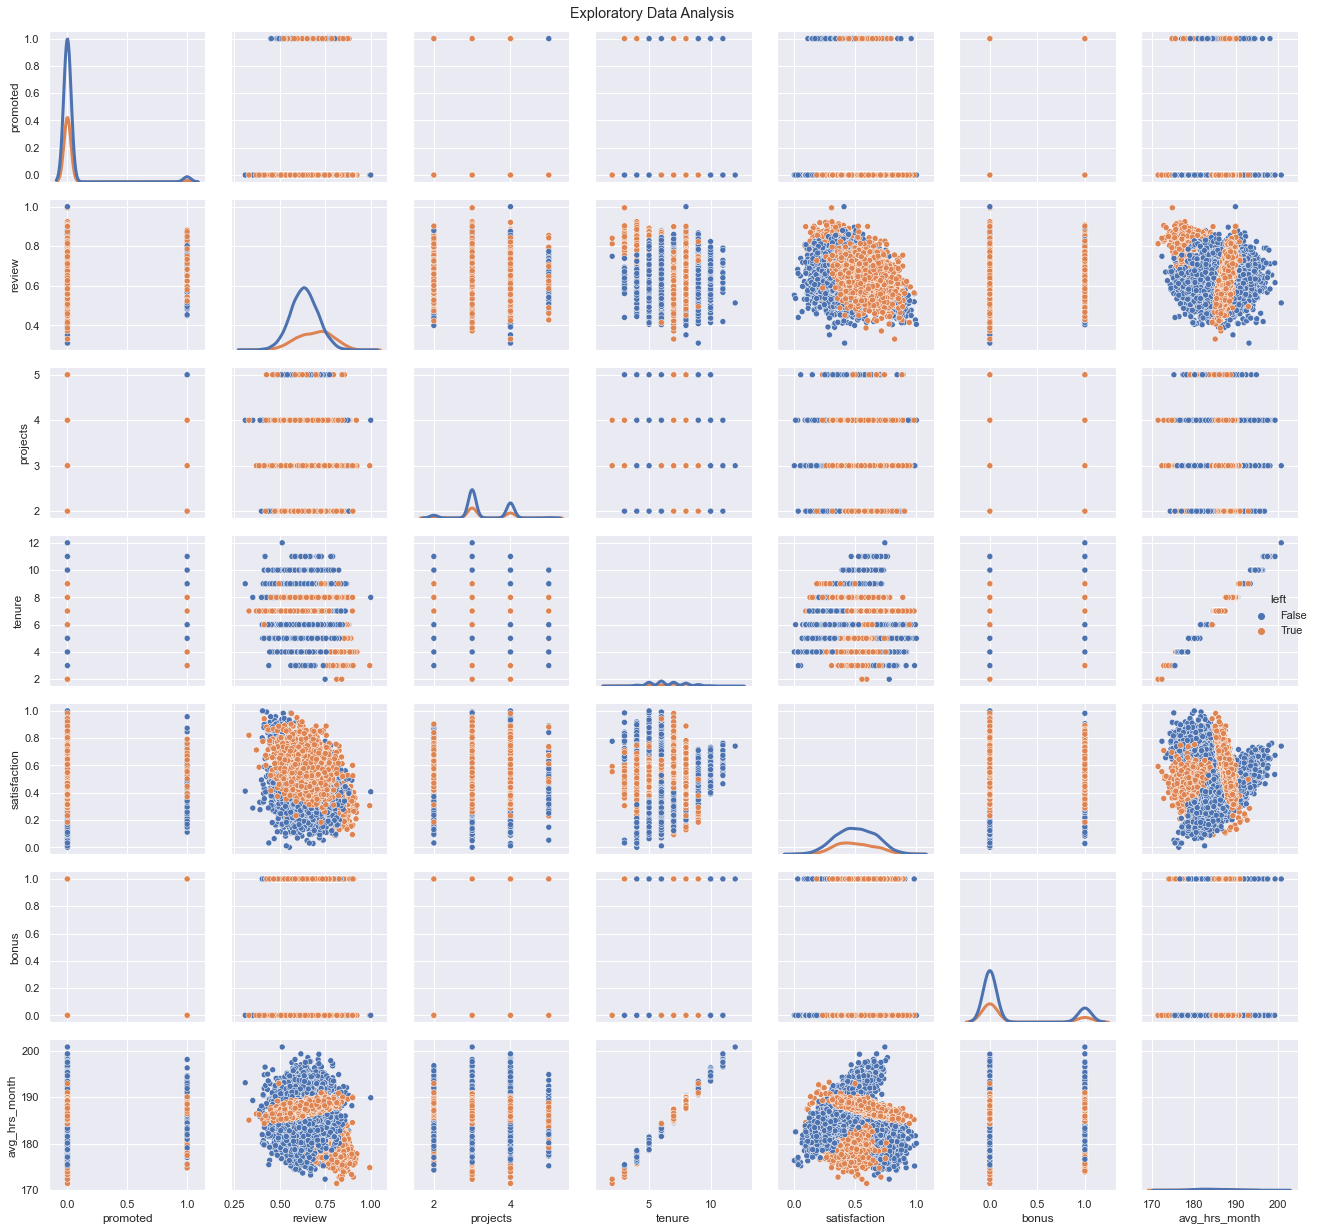

In [93]:
g = sns.PairGrid(df, hue="left")
#g.map_diag(sns.histplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)
g.map_offdiag(sns.scatterplot, 
             # size=df["salary"]
             )
g.add_legend(adjust_subtitles=True)
g.fig.suptitle('Exploratory Data Analysis')
plt.tight_layout(pad=1.5)
plt.show()

### check linear correlations between numerical variables

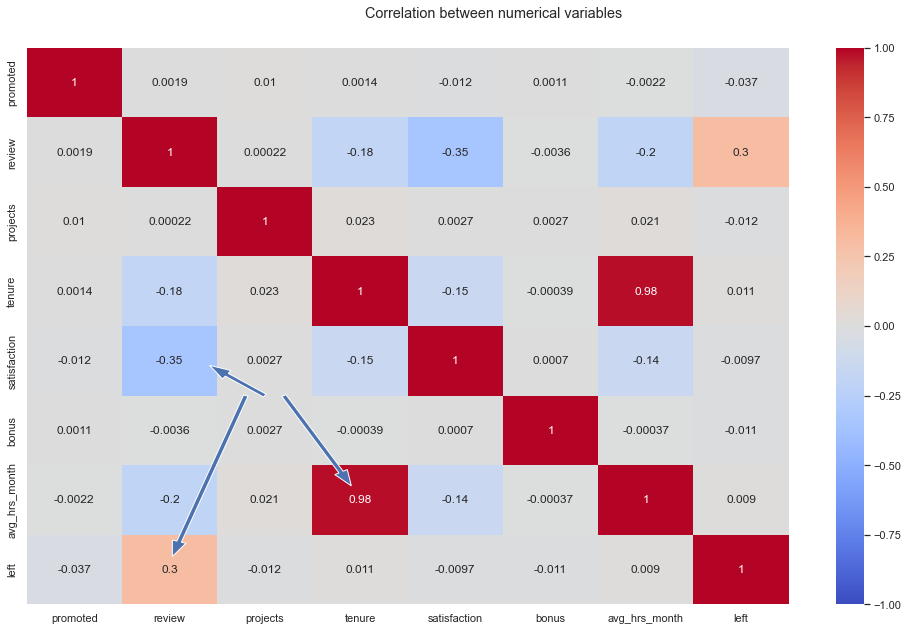

In [94]:
# check linear correlations between numerical variables

# collect scores
scores = pd.DataFrame(index=['promoted', 'review', 'projects', 'tenure', 'satisfaction', 'bonus',
       'department_IT', 'department_admin', 'department_engineering',
       'department_finance', 'department_logistics', 'department_marketing',
       'department_operations', 'department_retail', 'department_sales',
       'department_support', 'salary_high', 'salary_low', 'salary_medium'])

scores['pearsonr'] = df.corr().iloc[-1, :-1]

# correlation matrix
sns.heatmap(df.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')
plt.suptitle('Correlation between numerical variables')
plt.tight_layout(pad=1.5)
plt.arrow(2.7, 5, 0.6, 1.1, width = 0.05, label='A')
plt.arrow(2.3, 5, -0.7, 2.1, width = 0.05, label='B')
plt.arrow(2.5, 5, -0.4, -0.3, width = 0.05, label='C')
plt.show()

In [92]:
scores[0:8] # clipped after 8 vars

,pearsonr,chi2-p-value,mutual_info,rf_featimport
promoted,-0.036777,12.9034,0.001817,0.004418
review,0.304294,NaN,0.062089,0.345520
projects,-0.012408,NaN,0.006608,0.031460
tenure,0.010521,NaN,0.038929,0.175712
satisfaction,-0.009721,NaN,0.000830,0.336442
bonus,-0.011485,1.2583,0.006141,0.016654
department_IT,NaN,NaN,0.000000,0.005036
department_admin,NaN,NaN,0.001877,0.004676


From the correlation matrix we can recognize at least three values that are potentially of interest (arrow marked) and may be relevant for our 'left' target variable and warrant certainly further investigation.

The linear correlation between ***avg_hrs_month*** of the employee and the ***tenure*** is near to perfect and quite remarkable in the light of the fact that both are quite different variables to begin with, so lets investigate this further:


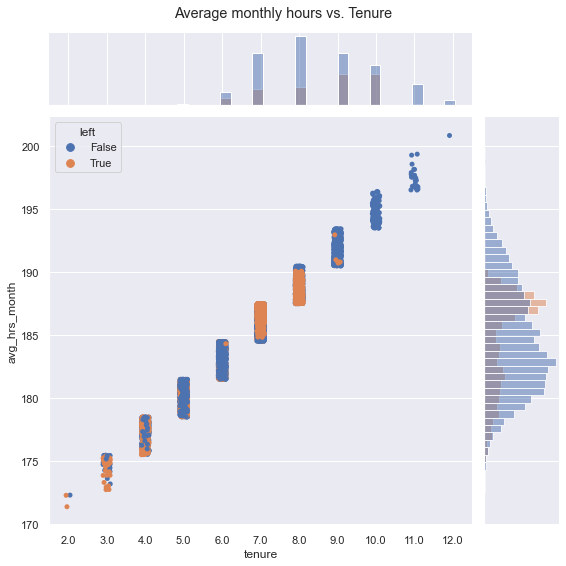

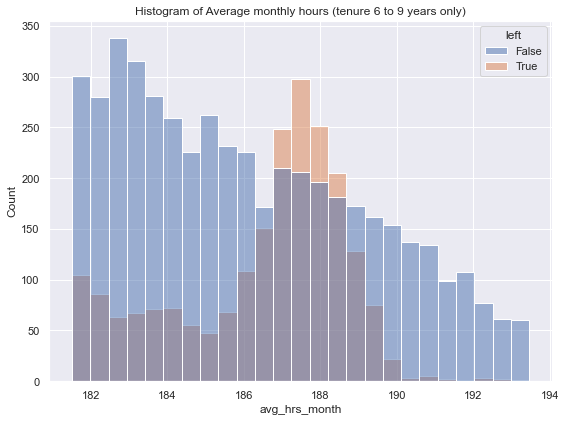

In [105]:
gg1 = sns.JointGrid(data=df, x="tenure", y="avg_hrs_month", hue='left', height=8) 
gg1.plot(sns.stripplot, sns.histplot)
plt.suptitle('Average monthly hours vs. Tenure')
plt.tight_layout(pad=1)
plt.show()

# tenure 7-8 subset
dften78 = df[(df['tenure'] == 7.0) | (df['tenure'] == 8.0)]
# tenure 6-9 subset
dften69 = df[(df['tenure'] > 5.0) & (df['tenure'] < 10.0)]
plt.figure(figsize=(8,6))
sns.histplot(data=dften69, x="avg_hrs_month", hue='left')
plt.title('Histogram of Average monthly hours (tenure 6 to 9 years only)')
plt.tight_layout(pad=1)
plt.show()

We understand the variable **'avg_hrs_month'** as the average amount of hours the employee is working and actually putting time in, this is not the amount of hours paid or contractually agreed amount of hours or anything else. It is assumed that this a variable as proxy for work ethic/effort and motivation. 

Therefore observing the factual monthly average ours in thight boundarys and also displaying a near perfect linear correlation with the unrelated variable tenure is quite suspect and hints to a data error somewhere in the data preparation pipeline. A verification of the variable's data integrity is necessary. As is we will disregard this data as being implausible and likely erroneous.

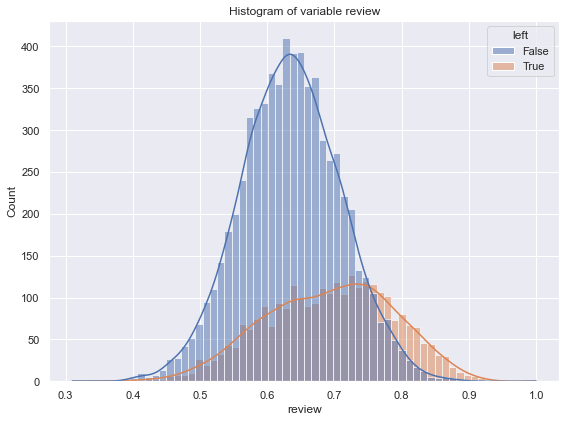

In [109]:
plt.figure(figsize=(8,6))
sns.histplot(data=df, x="review", hue='left', kde=True)
plt.title('Histogram of variable review')
plt.tight_layout(pad=1)
plt.show()

### Chi Squared tests of independence for categorical variables

assume the null hypothesis, which is no relationship between variable A (i.e. age) and variable B (i.e. ATF). You calculate the expected value for each cell based on the distribution of your variables, and compare with the observed value. The assumption here is that any variance in observations is from distributions in the data, not any underlying relationship.

In [16]:
"""# pandas crosstab recommended as frequencies are required
# we try package researchpy instead
#pd.pivot_table(df,index='promoted', columns='department', values='left')

#!pip install researchpy
import researchpy as rp

crosstab, test_results, expected = rp.crosstab(df["department"], df["left"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab
test_results.loc[1,'results']
test_results"""

'# pandas crosstab recommended as frequencies are required\n# we try package researchpy instead\n#pd.pivot_table(df,index=\'promoted\', columns=\'department\', values=\'left\')\n\n#!pip install researchpy\nimport researchpy as rp\n\ncrosstab, test_results, expected = rp.crosstab(df["department"], df["left"],\n                                               test= "chi-square",\n                                               expected_freqs= True,\n                                               prop= "cell")\n\ncrosstab\ntest_results.loc[1,\'results\']\ntest_results'

We test the four categorical variables against our target 'churn' variable with the CHI-SQUARE TEST OF INDEPENDENCE by utilizing researchpy's solution of crosstabulating contigency tables and testing them in one go. Expect value tables are created as well that could be used if required for eyeballing deviations from expected independent outcome.

In [121]:
import researchpy as rp
from scipy.stats import chi2_contingency
from scipy.stats import norm

# categorical variables to test vs. target variable:
variables = ['department', 'promoted', 'salary', 'bonus']

target = ['left'] * 4
tests = zip(variables,target)

for v,t in tests:
    print(v,'vs.',t)
    crosstab, res, expected = rp.crosstab(df[v], df[t],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
    string = res.loc[0,'Chi-square test'], res.loc[0,'results'], ' | ', res.loc[1,'Chi-square test'], res.loc[1,'results'],  ' | ', res.loc[2,'Chi-square test'], res.loc[2,'results'],'\n'
    print(string)
    scores.loc[v, 'chi2-p-value'] = res.loc[0,'results']
    if v=='promoted':
        crosstab_promoted = crosstab
        expected_promoted = expected

crosstab_promoted


department vs. left
('Pearson Chi-square ( 9.0) = ', 4.908, ' | ', 'p-value = ', 0.8423, ' | ', "Cramer's V = ", 0.0227, '\n')
promoted vs. left
('Pearson Chi-square ( 1.0) = ', 12.9034, ' | ', 'p-value = ', 0.0003, ' | ', "Cramer's phi = ", 0.0368, '\n')
salary vs. left
('Pearson Chi-square ( 2.0) = ', 1.1484, ' | ', 'p-value = ', 0.5632, ' | ', "Cramer's V = ", 0.011, '\n')
bonus vs. left
('Pearson Chi-square ( 1.0) = ', 1.2583, ' | ', 'p-value = ', 0.262, ' | ', "Cramer's phi = ", 0.0115, '\n')


left               
left      False   True     All
promoted                      
0         68.39  28.58   96.97
1          2.43   0.60    3.03
All       70.82  29.18  100.00

The Chi-Square test results only show one signifcant p-value with the variable ***promoted***, for which the Null Hypothesis could be actually rejected and we can conclude that there is a significant change in proportion. The assumptions required for this test are met (independency + no cell count zero or lower than 5 in contigency table). This variable ***promoted*** will have to be subject of a post-hoc test normally, we omit this however as the direction of the difference is obvious from the contigency table and both variables are binary. Being promoted recently an employee is only at risk to leave the company at 19.8% vs. 29.5% unpromoted (0.6/3.03 vs. 28.58/96.97).

### Information Gain filtering with Mututal Information

In [28]:
import numpy as np
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(X, y, discrete_features='auto')
mi_sorted = pd.Series(mi, index=rfdf_columns).sort_values(ascending=False)
print(mi_sorted)

scores['mutual_info'] = mi_sorted

review                    0.062089
tenure                    0.038929
projects                  0.006608
bonus                     0.006141
department_admin          0.001877
promoted                  0.001817
department_marketing      0.001731
department_engineering    0.001683
satisfaction              0.000830
salary_high               0.000767
department_support        0.000614
department_sales          0.000000
salary_low                0.000000
department_finance        0.000000
department_retail         0.000000
department_operations     0.000000
department_logistics      0.000000
department_IT             0.000000
salary_medium             0.000000
dtype: float64


With the Mutual Information method two variables can be identified that determine the employee rentention: ***review*** and ***tenure***

In [85]:
from scipy import stats

df2 = pd.get_dummies(df)
df2_columns = ['review', 'projects', 'tenure', 'satisfaction'] # categorical variables removed

X=df2[df2_columns]  # Features
y=df2['left']  # Labels
my_important = []

# t-tests H0: unequal churn means
for col in df2_columns:
    pvalue = stats.ttest_ind(df2.loc[df2.left==1][col], df2.loc[df2.left==0][col])[1]
    if pvalue < 0.025:
        my_important.append(col)
        print(f'The variable {col} is statistically significant with a p-value = {pvalue:.2}')
    else:
        print(f'The variable {col} is NOT statistically significant')
                
#stats.ttest_ind(df2.loc[df2.left==1]['tenure'], df2.loc[df2.left==0]['tenure'])

The variable review is statistically significant with a p-value = 1.5e-203
The variable projects is NOT statistically significant
The variable tenure is NOT statistically significant
The variable satisfaction is NOT statistically significant


The variable ***review*** is tested signifcant and also fulfills the normality dsitribution assumption. However the independent variable ***promoted*** is binary and cannot be tested with a t-test and has to be disregarded.

### Random Forest feature importances 

In [21]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X,y)
RandomForestClassifier(bootstrap=True, class_weight='balanced', criterion='gini',
                      )

import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

scores['rf_featimport'] = feature_imp

In [22]:
# min max scale column-wise for better cross-column comparison

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
standardized_scores = scores.copy()

# iterate columnwise
for (columnName, columnData) in scores.iteritems():
    scaler.fit(standardized_scores[columnName].values.reshape(-1, 1))
    standardized_scores[columnName] = scaler.transform(standardized_scores[columnName].values.reshape(-1, 1))

print('scores (clipped to 5 vars):')
print(scores.sort_values('rf_featimport', ascending=False).head())
print('\nmin-max-scaled (clipped to 5 vars):')
print(standardized_scores.sort_values('rf_featimport', ascending=False).head())

scores (clipped to 5 vars):
              pearsonr  chi2-p-value  mutual_info  rf_featimport
review        0.304294           NaN     0.062089       0.345520
satisfaction -0.009721           NaN     0.000830       0.336442
tenure        0.010521           NaN     0.044911       0.175712
projects     -0.012408           NaN     0.002184       0.031460
bonus        -0.011485        1.2583     0.000000       0.016654

min-max-scaled (clipped to 5 vars):
              pearsonr  chi2-p-value  mutual_info  rf_featimport
review        1.000000           NaN     1.000000       1.000000
satisfaction  0.079328           NaN     0.013362       0.973387
tenure        0.138676           NaN     0.723328       0.502179
projects      0.071450           NaN     0.035173       0.079277
bonus         0.074156      0.009349     0.000000       0.035872


From our panel of different methods we can more reliably summarize and infer which variables are truly relevant and will determine employee retention across the company work force population.

A clear single most important variable turned out to be the variable ***review*** which is related positively with employee churn. The better the employee is assessed by the company the more likely it is, that this employee is going to leave. How this is exactly interacting should be subject to further domain specific research and Human Resources and other relevant stakeholders should be involved in hypothesizing further. A common explanation is that expectations with positively reviewed employeed could rise and are not managed or met to the employees satisfaction.

Satisfaction is the next relevant variable and it is quite an odd one. As we could see from the following figure we can clearly state a negativly correlated relationship between both variables:

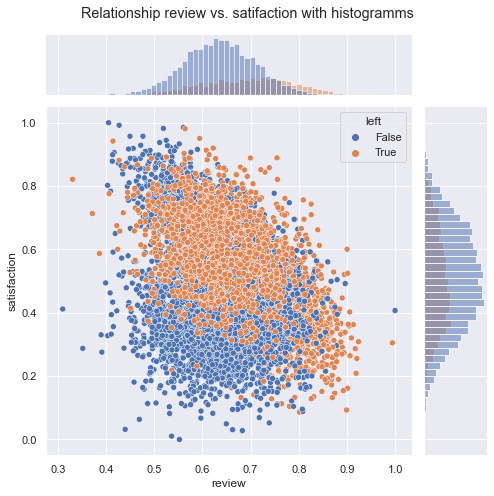

In [114]:
g3 = sns.JointGrid(data=df, x="review", y="satisfaction", hue='left', height=7) 
g3.plot(sns.scatterplot, sns.histplot)
plt.suptitle('Relationship review vs. satifaction with histogramms')
plt.tight_layout(pad=1)
plt.show()

It is striking that employees often tend to be reviewed well or satisfied with the job/situation, but much less so both at the same time: ***satisfaction*** is negativly correlated with ***review*** for all employees irrespective if having left or not. The variable satisfaction was not deemed by all methods unisono as so much relevant and could be just a proxy of the variable ***review*** through its admittedly weak correlation.

The last remarkable variable that shows predictive power is the ***tenure*** variable that has equally strong predictive scores with Mutual Information and Random Forests. When looking at the histogram and compare ***tenure*** for both ***left*** outcomes, we can see clearly a rise in the ratio employees leaving with tenure years 7 and 8.

Other variables such as ***projects***, ***bonus*** and all other variables not even listed in the scores table, hardly play any role in the problem we look at. And this may be surprising since variables such as ***promoted*** and ***salary*** are naturally felt as being important. And they probably are important while not posing the problem here.

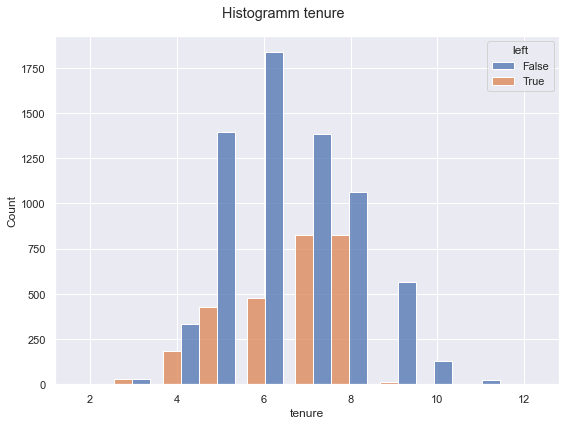

In [116]:
plt.figure(figsize=(8,6))
g10 = sns.histplot(data=df, x="tenure", hue='left',  multiple="dodge", shrink=-3)
plt.suptitle('Histogramm variable tenure')
plt.tight_layout(pad=1)
plt.show()

If we look at the ***tenure*** and ***review*** together we can get further insight as well: The significance of the ***review*** variable is particularly pronounced in the early years. The separation of the ***review*** mean between employees leaving and those not leaving is largest in with tenure 1 & 2 and fades off towards  ***tenure***==8 with the low at  ***tenure***==7. With those tenure years 7 and 8 the number and the share of employees leaving are highest in absolute terms.

<Figure size 576x432 with 0 Axes>

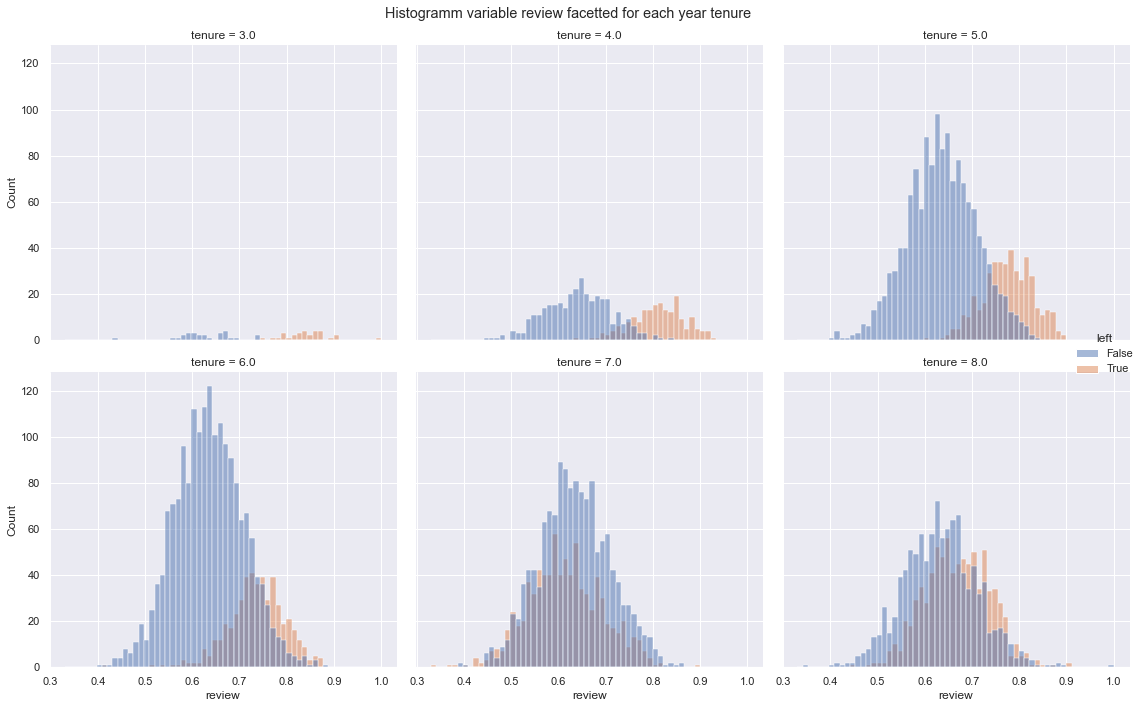

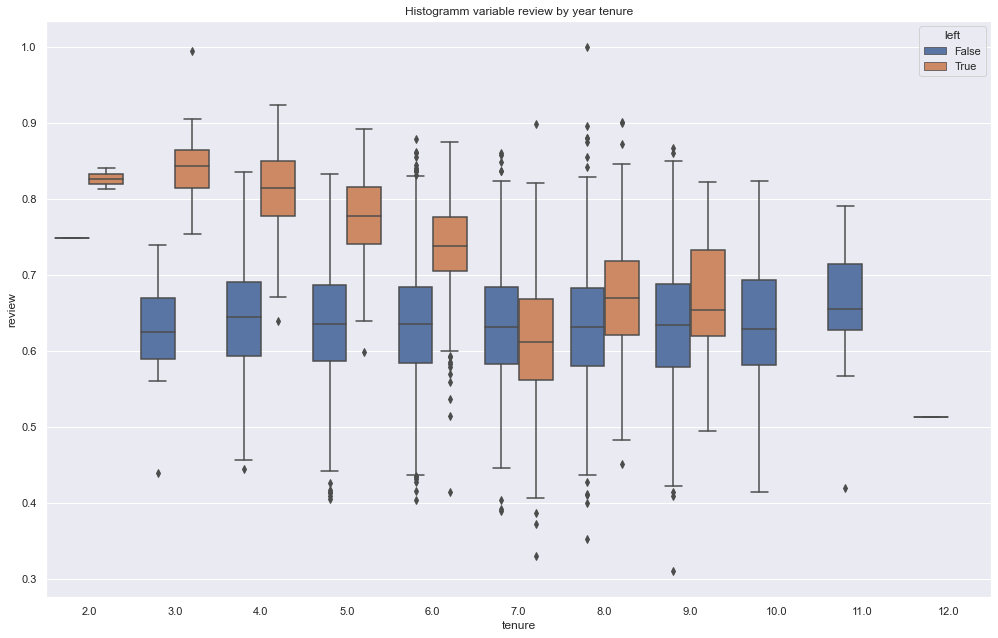

In [122]:
plt.figure(figsize=(8,6))
gg7 = sns.displot(data=df, x="review", hue="left", col=df[(df.tenure > 2) & (df.tenure < 9)]['tenure'], col_wrap=3)
plt.suptitle('Histogramm variable review facetted for each year tenure')
plt.tight_layout(pad=1)
plt.show()
gg8 = sns.boxplot(data=df, y="review", hue="left",x="tenure")
plt.title('Histogramm variable review by year tenure')
plt.tight_layout(pad=1)
plt.show()

#gg14 = sns.boxplot(data=df, y="review", hue="left",x="department")
#plt.show()

#gg15 = sns.boxplot(data=df, y="promoted", hue="left",x="tenure")

### 3. What recommendations would you make regarding ways to reduce employee turnover?

We just have worked out the relationship between ***tenure*** and ***review*** towards the dependant variable ***left*** and the eyeballed significant separation especially in early ***tenure*** years. From that we could conclude that it is especially important to reduce the over-churning of well reviewed employees up to tenure years 6, who for unknown reasons tend to be on average lower job satisfied then theirs peers with average reviews not leaving. For this further research is warranted because there is no data at hand which would allow further conclusions to draw from.

Generally speaking one could formulate a hypothesis that the drive to leave for highly reviewed employees may root in dissatisfaction due to the lack of career options just to name one. We have identified ***promoted*** as being signifcant as the only single categorical variable Other could be concerning the management practices, work schedule flexibility and employee work/life balance. Eventually such hypotheses could be verified to gain further insight. The problem introduction said to have processed employee exit interviews, there is however no such data in this dataset.

Trying to lower churn with progressed tenure could be tried, however it is not that unusal to have employees moving on after 7 or 8 years in the company and looking for a new challenge, this should be compared to (industry) benchmarks for example. And our data confirms this too: Higher absolute numbers of employees leave in years 7 und 8, at that time both equally higher and lower reviewed employees. As discussed already, the churn problem and the opportunity to reduce the overly high churn rate is to focus on the years 2 to 6.

The observed churn problem is not equally distributed across all departments as we could see in the analysis of question 1, where the departments marketing, retail, logistics and IT suffer from higher churn in comparison, here the departmental circumstances need to be looked at and new appropiate data to be acquired. At the same time, it has to be acknowledged that certain job functions generally see a higher churn such as 'retail' or 'wholesale' according to Mercer.

The given data seems not free from errors in case of the ***average hours monthly*** which did not deserve our trust and was dismissed eventually in this analysis. With its absence an important feature is missing that could be interpreted together with the satisfaction variable as a measure for employee engagement. Such a metric can be certainly an early indicator for dissatisfied employees. Here it is recommended to reprocess the data pipeline and eliminate the errors or start mining the data from scratch.

sources:
https://www.imercer.com/articleinsights/North-American-Employee-Turnover-Trends-and-Effects

## 💪 Competition challenge

Create a report that covers the following:
1. Which department has the highest employee turnover? Which one has the lowest?
2. Investigate which variables seem to be better predictors of employee departure.
3. What recommendations would you make regarding ways to reduce employee turnover?

## 🧑‍⚖️ Judging criteria

| CATEGORY | WEIGHTING | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Recommendations** | 35%       | <ul><li>Clarity of recommendations - how clear and well presented the recommendation is.</li><li>Quality of recommendations - are appropriate analytical techniques used & are the conclusions valid?</li><li>Number of relevant insights found for the target audience.</li></ul>       |
| **Storytelling**  | 35%       | <ul><li>How well the data and insights are connected to the recommendation.</li><li>How the narrative and whole report connects together.</li><li>Balancing making the report in-depth enough but also concise.</li></ul> |
| **Visualizations** | 20% | <ul><li>Appropriateness of visualization used.</li><li>Clarity of insight from visualization.</li></ul> |
| **Votes** | 10% | <ul><li>Up voting - most upvoted entries get the most points.</li></ul> |

## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- Remove redundant cells like the judging criteria, so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!